In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
train = pd.read_csv('C:/Users/mcasw/NIDS PROJECT/DATA/UNSW_NB15_training-set.csv')

In [3]:
test=pd.read_csv('C:/Users/mcasw/NIDS PROJECT/DATA/UNSW_NB15_training-set.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
train.describe(include='object')

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


In [7]:
train.shape

(82332, 45)

In [8]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [10]:
total = test.shape[0]
missing_columns = [col for col in test.columns if test[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = test[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [11]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [12]:
print(f"Number of duplicate rows: {test.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
print(train.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [14]:
print(test.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [15]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


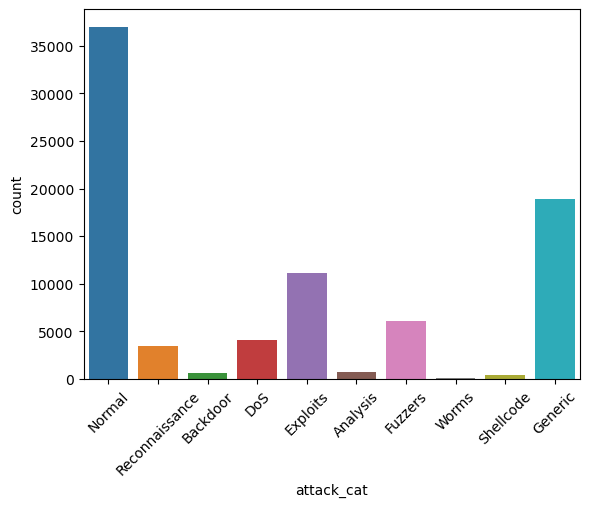

In [16]:
sns.countplot(x='attack_cat', data=train)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

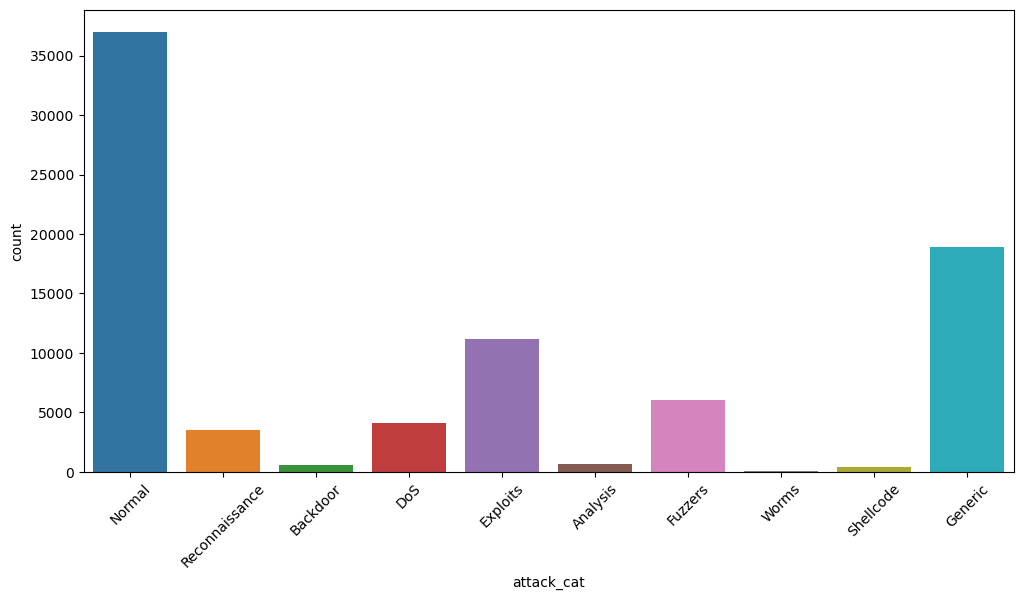

In [17]:
plt.figure(figsize=(12, 6))  # Set a larger figure size
sns.countplot(x='attack_cat', data=train)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [18]:
print('Class distribution Training set:')
print(train['attack_cat'].value_counts())

Class distribution Training set:
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [19]:
print('Class distribution Testing set:')
print(test['attack_cat'].value_counts())

Class distribution Testing set:
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [20]:
def preprocess_data(df):
    # Handle missing values (replace NaNs with a suitable value or strategy)
    df.fillna(value='missing', inplace=True)  # Replace NaNs with the string 'missing' for simplicity

    # Label encode categorical columns
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

    return df

# Apply the preprocessing to your test dataset
test_processed = preprocess_data(test)

In [21]:
X_train = train.drop(['attack_cat','label'], axis=1)
Y_train = train['label']

In [22]:
X_test = test.drop(['attack_cat','label'], axis=1)
Y_test = test['label']

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming you have split your data into features (X_train) and labels (Y_train)

# Label encode categorical features
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])

# Univariate Feature Selection
X_train_selected = SelectKBest(f_classif, k=10).fit_transform(X_train, Y_train)

# Tree-based Feature Importance
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
feature_importances = rf_classifier.feature_importances_
indices = feature_importances.argsort()[-10:][::-1]
X_train_importance = X_train.iloc[:, indices]

# Print the selected features or feature indices based on the method you choose
print("Selected Features (Univariate):", X_train_selected.shape[1])
print("Selected Features (Tree-based):", X_train_importance.columns.tolist())


Selected Features (Univariate): 10
Selected Features (Tree-based): ['id', 'ct_state_ttl', 'sttl', 'sload', 'ct_dst_src_ltm', 'ct_dst_sport_ltm', 'dbytes', 'ct_srv_dst', 'smean', 'sbytes']


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming you have split your data into features (X_train) and labels (Y_train)

# Label encode categorical features
label_encoder = LabelEncoder()
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = label_encoder.fit_transform(X_test[col])

# Univariate Feature Selection
X_test_selected = SelectKBest(f_classif, k=10).fit_transform(X_test, Y_test)

# Tree-based Feature Importance
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_test, Y_test)
feature_importances = rf_classifier.feature_importances_
indices = feature_importances.argsort()[-10:][::-1]
X_test_importance = X_test.iloc[:, indices]

# Print the selected features or feature indices based on the method you choose
print("Selected Features (Univariate):", X_test_selected.shape[1])
print("Selected Features (Tree-based):", X_test_importance.columns.tolist())


Selected Features (Univariate): 10
Selected Features (Tree-based): ['id', 'sttl', 'ct_state_ttl', 'ct_dst_src_ltm', 'ct_dst_sport_ltm', 'sload', 'rate', 'ct_srv_dst', 'smean', 'sbytes']


In [25]:
X_train = X_train[X_train_importance.columns.tolist()]

In [26]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [28]:
x_train.shape

(57632, 10)

In [29]:
x_test.shape

(24700, 10)

In [30]:
y_train.shape

(57632,)

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'train' with features and labels
X_train = train.drop(['attack_cat', 'label'], axis=1)
y_train = train['label']

# Define numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the pipeline with preprocessing and the neural network model
nn_model = MLPClassifier(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', nn_model)])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['proto', 'service', 'state'], dtype='object'))])),
                ('classifier', MLPClassifier(random_state=42))])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame 'train' with features and labels
X_train = train.drop(['attack_cat', 'label'], axis=1)
y_train = train['label']

# Define numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the pipeline with preprocessing and the logistic regression model
lr_model = LogisticRegression(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', lr_model)])

# Fit the model
pipeline.fit(X_train, y_train)


C:\Users\mcasw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['proto', 'service', 'state'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Assuming X_train is a DataFrame

# Select features for scaling and one-hot encoding
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and XGBoost model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Train the model
xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_de

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(exclude=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical features
    ])

# Create an SVM model pipeline
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', SVC(random_state=42))])

# Train the SVM model
svm_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['proto', 'service', 'state'], dtype='object'))])),
                ('classifier', SVC(random_state=42))])

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     37000
           1       0.93      0.95      0.94     45332

    accuracy                           0.93     82332
   macro avg       0.93      0.93      0.93     82332
weighted avg       0.93      0.93      0.93     82332

Confusion Matrix:
 [[33604  3396]
 [ 2397 42935]]


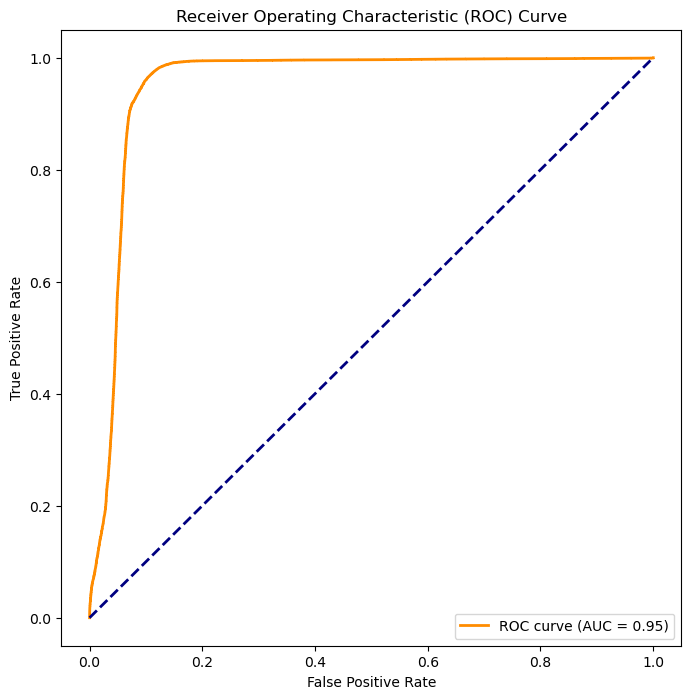

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels

# Define categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(exclude=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical features
    ])

# Create an SVM model pipeline
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', SVC(random_state=42))])

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5)

# Use cross_val_predict with the entire pipeline
svm_predictions = cross_val_predict(svm_model, X_train, y_train, cv=cv)

# Evaluate the SVM model
accuracy = accuracy_score(y_train, svm_predictions)
classification_report_output = classification_report(y_train, svm_predictions)
conf_matrix = confusion_matrix(y_train, svm_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve
svm_probabilities = cross_val_predict(svm_model, X_train, y_train, cv=cv, method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train, svm_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.93     37000
           1       0.93      0.97      0.95     45332

    accuracy                           0.94     82332
   macro avg       0.95      0.94      0.94     82332
weighted avg       0.94      0.94      0.94     82332

Confusion Matrix:
 [[33486  3514]
 [ 1202 44130]]


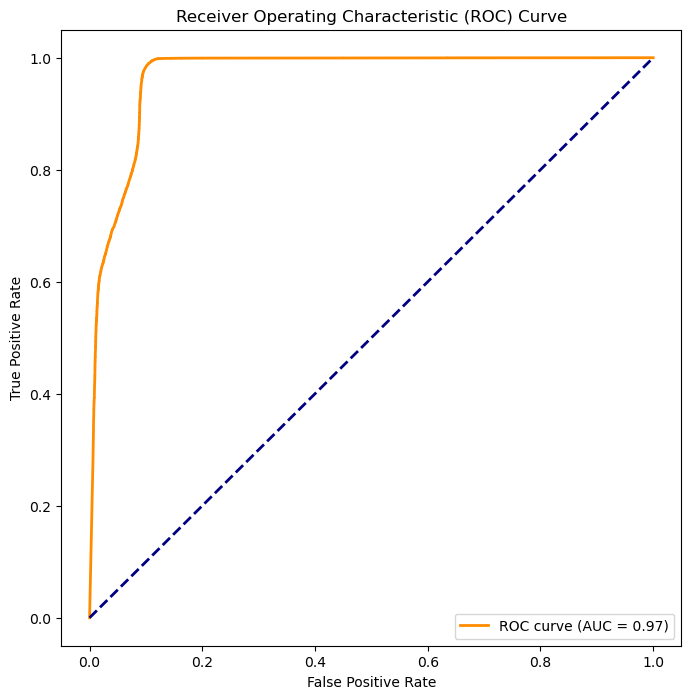

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels

# Define numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the pipeline with preprocessing and the neural network model
nn_model = MLPClassifier(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', nn_model)])

# Use cross_val_predict with the entire pipeline
nn_predictions = cross_val_predict(pipeline, X_train, y_train, cv=5)

# Evaluate the MLPClassifier model
accuracy = accuracy_score(y_train, nn_predictions)
classification_report_output = classification_report(y_train, nn_predictions)
conf_matrix = confusion_matrix(y_train, nn_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve
nn_probabilities = cross_val_predict(pipeline, X_train, y_train, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, nn_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



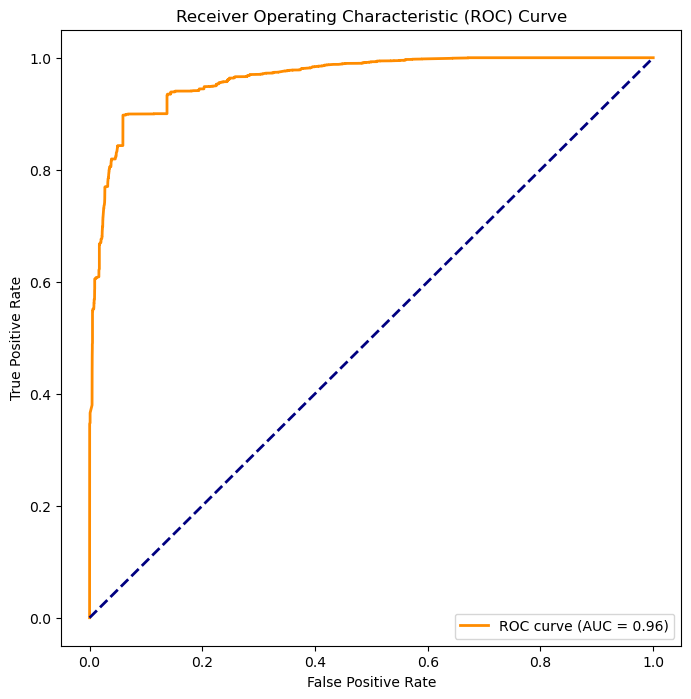

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     37000
           1       0.95      0.84      0.89     45332

    accuracy                           0.89     82332
   macro avg       0.89      0.89      0.89     82332
weighted avg       0.90      0.89      0.89     82332

Confusion Matrix:
 [[34894  2106]
 [ 7113 38219]]


In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Use cross_val_predict with the entire pipeline
xgb_predictions = cross_val_predict(xgb_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), method='predict_proba')[:, 1]

# Evaluate the XGBoost model
fpr, tpr, thresholds = roc_curve(y_train, xgb_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print other metrics
accuracy = accuracy_score(y_train, xgb_predictions.round())
classification_report_output = classification_report(y_train, xgb_predictions.round())
conf_matrix = confusion_matrix(y_train, xgb_predictions.round())

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


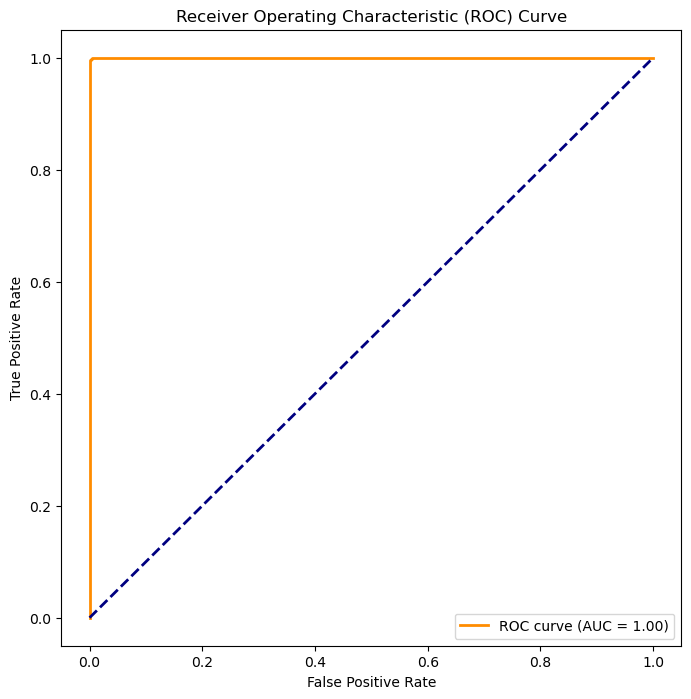

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC Curve
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
